### Download libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding = 'unicode_escape', parse_dates=['ORDERDATE'])
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [ ]:
df.isna().mean()

ORDERNUMBER         0.000000
QUANTITYORDERED     0.000000
PRICEEACH           0.000000
ORDERLINENUMBER     0.000000
SALES               0.000000
ORDERDATE           0.000000
STATUS              0.000000
QTR_ID              0.000000
MONTH_ID            0.000000
YEAR_ID             0.000000
PRODUCTLINE         0.000000
MSRP                0.000000
PRODUCTCODE         0.000000
CUSTOMERNAME        0.000000
PHONE               0.000000
ADDRESSLINE1        0.000000
ADDRESSLINE2        0.893022
CITY                0.000000
STATE               0.526390
POSTALCODE          0.026922
COUNTRY             0.000000
TERRITORY           0.380446
CONTACTLASTNAME     0.000000
CONTACTFIRSTNAME    0.000000
DEALSIZE            0.000000
dtype: float64

In [ ]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1)
df.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium


#### Drop georaphic features and names, phone

In [ ]:
df.shape

(2823, 14)

In [ ]:
df.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = df[x].value_counts().index, y = df[x].value_counts(), color = df[x].value_counts().index, height = 600)
  fig.show();

In [ ]:
barplot_visualization('COUNTRY')

In [ ]:
barplot_visualization('STATUS');

#### Drop unbalanced feature 

In [ ]:
df.drop(columns=['STATUS'], axis=1, inplace=True)

In [ ]:
print('Columns resume: ', df.shape[1])

Columns resume:  13


In [ ]:
barplot_visualization('PRODUCTLINE')

In [ ]:
barplot_visualization('DEALSIZE')

### Prepare data

In [ ]:
def dummies(x):
  dummy = pd.get_dummies(df[x])
  df.drop(columns=x, inplace=True)
  return pd.concat([df, dummy], axis = 1)

In [ ]:
df =  dummies('COUNTRY')

In [ ]:
df =  dummies('PRODUCTLINE')

In [ ]:
df =  dummies('DEALSIZE')

In [ ]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y = pd.Categorical(df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [ ]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [ ]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_group = df.groupby(by='ORDERDATE').sum()
fig = px.line(x = df_group.index, y = df_group.SALES, title='sales_peak')
fig.show();

In [ ]:
df.drop('ORDERDATE', axis=1, inplace=True)

#### drop 'ORDERDATE', 'QTR_ID' because we have 'MONTH' etc.

In [ ]:
df.drop('QTR_ID', axis=1, inplace=True)

In [ ]:
df.shape

(2823, 37)

## Use K-MEANS algorithm

In [ ]:
scaler =  StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
scores = []
range_values = range(1, 15)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)

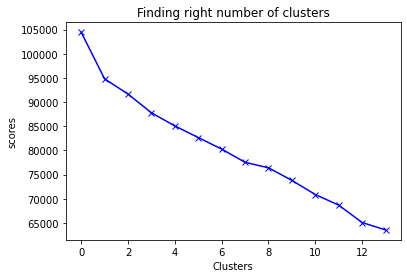

In [ ]:
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show();

#### The elbow method

In [ ]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_
labels

array([2, 2, 0, ..., 0, 2, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(4, 37)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.289788,0.579770,-0.004700,0.456405,0.008677,-0.018648,0.375574,-0.163826,-0.010965,0.012304,...,0.087826,-0.010255,-0.047917,-0.025108,-0.055342,0.068710,-0.069984,-0.242672,1.019676,-0.912100
1,-0.261543,0.190162,-0.354187,-0.145888,-0.381699,0.524237,0.008588,0.135762,-0.264819,-0.140961,...,-0.466392,-0.364452,-0.251198,0.908334,0.390660,-0.345470,0.509262,-0.242672,-0.071440,0.183429
2,-0.461726,-0.732291,0.046580,-0.810206,0.011499,-0.010488,-0.584649,0.282176,0.029304,-0.015033,...,-0.154998,0.019168,0.078860,0.040821,0.065682,-0.040432,0.081293,-0.242672,-0.980703,1.096370
3,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,...,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.912100


#### Invert the data

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,37.915267,95.352915,6.446311,4394.376092,7.124178,2003.802045,115.806428,48.599708,6.281958e-02,0.021183,...,0.384222,1.139518e-01,0.093499,7.596786e-02,0.018262,1.278305e-01,0.186267,7.216450e-16,1.000000e+00,-3.330669e-16
1,32.545455,87.494242,4.969697,3285.230909,5.696970,2004.181818,101.060606,58.060606,1.387779e-17,0.000000,...,0.121212,2.775558e-17,0.030303,3.333333e-01,0.090909,-1.387779e-17,0.424242,6.938894e-18,4.545455e-01,5.454545e-01
2,30.595728,68.887729,6.662975,2061.864003,7.134494,2003.807753,77.223892,62.684335,7.278481e-02,0.017405,...,0.268987,1.234177e-01,0.132911,9.414557e-02,0.037975,9.414557e-02,0.248418,6.800116e-16,-1.054712e-15,1.000000e+00
3,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,4.458599e-02,0.025478,...,0.617834,1.210191e-01,0.057325,-6.938894e-17,0.006369,4.458599e-02,0.152866,1.000000e+00,-7.216450e-16,1.387779e-15


In [ ]:
sales_of_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
sales_of_cluster.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
